# Stock market clustering

_Data Structures and Algorithms_

_Imperial College_





## Part 1: Pandas


In the previous homework, we used lists to study stock prices. The `pandas` library provides some more effective tools for data analysis.

The assignment comes with two files containing company data:
- `SP_500_firms.csv` with firm and ticker names
- `SP_500_close_2015.csv` with stock price data for 2015

Let's first load up this data.

In [91]:
# Load data into Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

def read_names_into_dict():
    """
    Read company names into a dictionary
    """
    d = dict()
    with open("SP_500_firms.csv") as csvfile:
        input_file = csv.DictReader(csvfile)
        for row in input_file:
            #print(row)
            d[row['Symbol']] = [row['Name'],row['Sector']]
    return d

names_dict = read_names_into_dict()
comp_names = names_dict.keys()

# Read price data with pandas
filename = 'SP_500_close_2015.csv'
price_data = pd.read_csv(filename, index_col=0)
print(price_data)

                   MMM        ABT       ABBV         ACN       ATVI  \
Date                                                                  
2015-01-02  156.678596  43.160459  61.986410   86.129228  19.765196   
2015-01-05  153.145069  43.170070  60.819874   84.674997  19.490271   
2015-01-06  151.511999  42.679830  60.518833   84.064223  19.126976   
2015-01-07  152.610267  43.025880  62.964797   85.828689  18.714587   
2015-01-08  156.267949  43.910238  63.623323   87.137495  18.901144   
...                ...        ...        ...         ...        ...   
2015-12-24  148.189203  44.272341  56.803111  103.227707  38.605835   
2015-12-28  148.218606  44.203626  57.084893  103.079148  38.714948   
2015-12-29  149.855459  44.979129  57.765054  104.307222  39.260511   
2015-12-30  148.894914  44.439223  58.105133  104.842030  39.111721   
2015-12-31  147.650116  44.085829  57.561007  103.495108  38.397531   

                   AYI       ADBE         AAP        AES         AET  ...  \

In [92]:
price_data.head()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,156.678596,43.160459,61.986410,86.129228,19.765196,139.234407,72.339996,158.132353,12.860543,87.354435,...,33.927597,13.191375,41.513829,32.998169,37.072501,50.169998,69.542301,110.963875,27.853656,42.723658
2015-01-05,153.145069,43.170070,60.819874,84.674997,19.490271,135.889914,71.980003,156.047994,12.494440,86.173965,...,33.542483,12.903563,40.752108,33.199318,34.765202,49.130001,68.129346,115.103219,26.810004,42.467175
2015-01-06,151.511999,42.679830,60.518833,84.064223,19.126976,134.187800,70.529999,155.938290,12.212822,86.301853,...,33.720953,12.730876,40.161775,33.362155,34.560759,49.209999,67.293113,114.127520,25.786046,42.052863
2015-01-07,152.610267,43.025880,62.964797,85.828689,18.714587,136.566769,71.110001,159.289228,12.231597,88.033197,...,34.012134,12.893969,40.180818,33.381309,34.833350,48.590000,69.523080,116.965922,26.032190,42.920947
2015-01-08,156.267949,43.910238,63.623323,87.137495,18.901144,141.344618,72.919998,160.685446,12.419342,90.885990,...,34.406643,13.248937,41.075840,33.927287,35.096207,50.230000,70.734178,118.207726,26.396482,43.581878


In [93]:
price_data.describe()

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,151.240445,45.067555,59.532853,95.540953,27.351820,185.839553,80.967817,163.313504,11.452325,107.930044,...,33.192459,11.069191,42.454640,36.025538,34.701831,38.971944,78.129855,107.543330,28.180492,45.665167
std,7.107680,2.522206,4.742366,6.875068,5.686488,24.958500,6.373760,14.847493,1.288663,8.775297,...,1.329804,1.234858,3.035655,1.275883,1.549875,5.631780,7.133025,7.499312,1.982506,2.258266
min,133.969117,38.121817,46.901920,81.465997,18.213829,134.187800,69.989998,142.671386,8.562809,86.173965,...,30.564587,9.081719,36.734029,32.998169,29.885909,27.600000,65.847064,91.636308,23.501830,39.324541
25%,146.098764,43.318241,55.582699,90.824245,22.882658,166.476869,76.490002,151.131895,10.455896,104.172749,...,32.196438,10.100338,40.161342,35.395930,33.866610,33.460000,71.694150,101.314589,26.931264,43.978874
50%,152.868585,44.921188,59.153699,94.982332,25.408236,182.209625,79.825001,159.705316,11.926511,108.143008,...,33.028862,10.664143,41.758568,36.091841,34.888744,39.355002,77.018419,107.835618,27.954411,45.770399
75%,156.287518,47.124548,63.470802,101.395491,31.392042,201.155203,84.069998,173.011927,12.531814,114.007040,...,34.326218,12.388123,45.348610,36.777727,35.894561,43.884999,85.664143,114.208823,29.715322,47.099767
max,163.841622,49.970225,68.578266,108.674818,39.260511,239.748197,95.559998,200.062855,13.292200,131.110696,...,35.909463,13.431218,49.220191,39.467252,37.264386,50.230000,92.198695,120.001439,32.103599,54.831212


In [94]:
pd.set_option("display.max_info_columns",500)
price_data.reset_index().info(verbose = True)# Check the data types of the data and if there is any NaN value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 497 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    Date    252 non-null    object 
 1    MMM     252 non-null    float64
 2    ABT     252 non-null    float64
 3    ABBV    252 non-null    float64
 4    ACN     252 non-null    float64
 5    ATVI    252 non-null    float64
 6    AYI     252 non-null    float64
 7    ADBE    252 non-null    float64
 8    AAP     252 non-null    float64
 9    AES     252 non-null    float64
 10   AET     252 non-null    float64
 11   AMG     252 non-null    float64
 12   AFL     252 non-null    float64
 13   A       252 non-null    float64
 14   APD     252 non-null    float64
 15   AKAM    252 non-null    float64
 16   ALK     252 non-null    float64
 17   ALB     252 non-null    float64
 18   AA      252 non-null    float64
 19   ALXN    252 non-null    float64
 20   ALLE    252 non-null    float64
 21   AGN     252 no

In [95]:
price_data = price_data.reset_index()
print(price_data)

           Date         MMM        ABT       ABBV         ACN       ATVI  \
0    2015-01-02  156.678596  43.160459  61.986410   86.129228  19.765196   
1    2015-01-05  153.145069  43.170070  60.819874   84.674997  19.490271   
2    2015-01-06  151.511999  42.679830  60.518833   84.064223  19.126976   
3    2015-01-07  152.610267  43.025880  62.964797   85.828689  18.714587   
4    2015-01-08  156.267949  43.910238  63.623323   87.137495  18.901144   
..          ...         ...        ...        ...         ...        ...   
247  2015-12-24  148.189203  44.272341  56.803111  103.227707  38.605835   
248  2015-12-28  148.218606  44.203626  57.084893  103.079148  38.714948   
249  2015-12-29  149.855459  44.979129  57.765054  104.307222  39.260511   
250  2015-12-30  148.894914  44.439223  58.105133  104.842030  39.111721   
251  2015-12-31  147.650116  44.085829  57.561007  103.495108  38.397531   

            AYI       ADBE         AAP        AES  ...        XEL        XRX  \
0    13

In [96]:
price_data["Date"] = pd.to_datetime(price_data["Date"],format = "%Y-%m-%d")
print(price_data)

          Date         MMM        ABT       ABBV         ACN       ATVI  \
0   2015-01-02  156.678596  43.160459  61.986410   86.129228  19.765196   
1   2015-01-05  153.145069  43.170070  60.819874   84.674997  19.490271   
2   2015-01-06  151.511999  42.679830  60.518833   84.064223  19.126976   
3   2015-01-07  152.610267  43.025880  62.964797   85.828689  18.714587   
4   2015-01-08  156.267949  43.910238  63.623323   87.137495  18.901144   
..         ...         ...        ...        ...         ...        ...   
247 2015-12-24  148.189203  44.272341  56.803111  103.227707  38.605835   
248 2015-12-28  148.218606  44.203626  57.084893  103.079148  38.714948   
249 2015-12-29  149.855459  44.979129  57.765054  104.307222  39.260511   
250 2015-12-30  148.894914  44.439223  58.105133  104.842030  39.111721   
251 2015-12-31  147.650116  44.085829  57.561007  103.495108  38.397531   

            AYI       ADBE         AAP        AES  ...        XEL        XRX  \
0    139.234407  72

In [97]:
price_data = price_data.set_index('Date')
price_data

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,156.678596,43.160459,61.986410,86.129228,19.765196,139.234407,72.339996,158.132353,12.860543,87.354435,...,33.927597,13.191375,41.513829,32.998169,37.072501,50.169998,69.542301,110.963875,27.853656,42.723658
2015-01-05,153.145069,43.170070,60.819874,84.674997,19.490271,135.889914,71.980003,156.047994,12.494440,86.173965,...,33.542483,12.903563,40.752108,33.199318,34.765202,49.130001,68.129346,115.103219,26.810004,42.467175
2015-01-06,151.511999,42.679830,60.518833,84.064223,19.126976,134.187800,70.529999,155.938290,12.212822,86.301853,...,33.720953,12.730876,40.161775,33.362155,34.560759,49.209999,67.293113,114.127520,25.786046,42.052863
2015-01-07,152.610267,43.025880,62.964797,85.828689,18.714587,136.566769,71.110001,159.289228,12.231597,88.033197,...,34.012134,12.893969,40.180818,33.381309,34.833350,48.590000,69.523080,116.965922,26.032190,42.920947
2015-01-08,156.267949,43.910238,63.623323,87.137495,18.901144,141.344618,72.919998,160.685446,12.419342,90.885990,...,34.406643,13.248937,41.075840,33.927287,35.096207,50.230000,70.734178,118.207726,26.396482,43.581878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,148.189203,44.272341,56.803111,103.227707,38.605835,239.688297,94.300003,148.953695,9.290114,108.882926,...,34.870979,10.636072,46.878702,38.910551,36.670848,34.110001,72.708631,102.048397,27.560025,47.824658
2015-12-28,148.218606,44.203626,57.084893,103.079148,38.714948,239.169142,94.199997,150.372014,9.173745,108.207559,...,35.261251,10.411228,46.829718,38.930084,36.542246,33.599998,72.551420,101.393919,27.421133,47.596117
2015-12-29,149.855459,44.979129,57.765054,104.307222,39.260511,236.393678,95.330002,152.020057,9.319206,109.458975,...,35.339308,10.529314,47.202005,39.467252,36.700524,34.040001,72.944441,102.129305,27.589787,48.023390


### Returns

In the previous homework, we calculated stock price _returns_ over a period of time. The return is defined as the percentage change, so the return between periods $t-1$ and $t$ for stock price $p$ would be

$$
x_t = \frac{p_t - p_{t-1}}{p_{t-1}}.
$$

The returns in `pandas` for all the stocks in `price_data`.

In [98]:
# Calculate company returns in this cell
#calculate the return using pct_change 
daily_return = price_data.pct_change().stack().reset_index().rename(columns = {"level_1":"Stock",0:"Daily_return"}).set_index("Date")
daily_return

,Stock,Daily_return
Date,,
2015-01-05,MMM,-0.022553
2015-01-05,ABT,0.000223
2015-01-05,ABBV,-0.018819
2015-01-05,ACN,-0.016884
2015-01-05,ATVI,-0.013910
...,...,...
2015-12-31,YHOO,-0.003296
2015-12-31,YUM,-0.010297
2015-12-31,ZBH,0.001171


### Highest and lowest daily returns

Use pandas to find the 10 highest daily returns amongst all companies. Search online for what were the reasons behind the highest returns. Present your results in a clean and immediately readable form.

Repeat with the lowest daily returns.

In [99]:
# Your code here
highest = daily_return.reset_index().set_index(['Stock','Date'])["Daily_return"].nlargest(10).to_frame()
highest


,,Daily_return
Stock,Date,
FCX,2015-08-27,0.286616
WMB,2015-06-22,0.258999
TRIP,2015-10-14,0.255361
HAR,2015-01-29,0.237600
QRVO,2015-11-06,0.232254
WYNN,2015-10-02,0.228389
TRIP,2015-02-12,0.224915
HUM,2015-05-29,0.203128
KLAC,2015-10-21,0.187895


### Highest and lowest yearly returns

The 10 highest yearly returns amongst all companies. Present your results in a clean and immediately readable form.

The lowest yearly returns.

In [100]:
# Your code here
smallest= daily_return.reset_index().set_index(['Stock','Date'])["Daily_return"].nsmallest(10).to_frame()
smallest

,,Daily_return
Stock,Date,
PWR,2015-10-16,-0.285006
KORS,2015-05-27,-0.241954
BIIB,2015-07-24,-0.220802
SRCL,2015-10-23,-0.192767
YUM,2015-10-07,-0.188324
RL,2015-02-04,-0.182169
MU,2015-06-26,-0.181515
NRG,2015-12-04,-0.179581
MNK,2015-11-09,-0.169981


### Highest and lowest volatilities

The 10 highest yearly volatilities (standard deviations) amongst all companies. Present your results in a clean and immediately readable form.

The lowest volatilities.

In [101]:
price_data_stack = price_data.stack().reset_index().rename(columns = {"level_1":"Stock",0:"Price"}).set_index("Date")
price_data_stack

,Stock,Price
Date,,
2015-01-02,MMM,156.678596
2015-01-02,ABT,43.160459
2015-01-02,ABBV,61.986410
2015-01-02,ACN,86.129228
2015-01-02,ATVI,19.765196
...,...,...
2015-12-31,YHOO,33.259998
2015-12-31,YUM,71.775213
2015-12-31,ZBH,101.950427


In [102]:
# Your code here
yearly_std = price_data_stack.groupby("Stock").Price.std()
yearly_std

#highest_std = yearly_std.Std.nlargest(10).reset_index().set_index("Stock")
#highest_std

Stock
A        2.320281
AA       2.397744
AAL      4.342895
AAP     14.847493
AAPL     7.263457
          ...    
YHOO     5.631780
YUM      7.133025
ZBH      7.499312
ZION     1.982506
ZTS      2.258266
Name: Price, Length: 496, dtype: float64

### Correlations

Analysts often care about the _correlation_ of stock prices between firms. Correlation measures the statistical similarity between the two prices' movements. If the prices move very similarly, the correlation of their _returns_  is close to 1. If they tend to make exactly the opposite movements (ie one price moves up and the other one down), the correlation is close to -1. If there is no clear statistical relationship between the movements of two stock prices, the correlation in their returns is close to zero.

For a sample of stock price returns $x,y$ with observations for $n$ days, the correlation $r_{xy}$ between $x$ and $y$ can be calculated as:

$$
r_{xy} = \frac{\sum x_i y_i - n \bar{x}\bar{y}}{ns_x s_y} = {\frac {n\sum x_{i}y_{i}-\sum x_{i}\sum y_{i}}{{\sqrt {n\sum x_{i}^{2}-(\sum x_{i})^{2}}}~{\sqrt {n\sum y_{i}^{2}-(\sum y_{i})^{2}}}}}.
$$

Here $\bar{x}$ refers to the average value of $x$ over the $n$ observations, and $s_x$ to its standard deviation.

Based on time series of the stock returns we just computed, we can calculate a  correlation value for each pair of stocks, for example between MSFT (Microsoft) and AAPL (Apple). This gives us a measure of the similarity between the two stocks in this time period.


All correlations between companies. You can search online for a `pandas` or `numpy` function that does this directly.

In [103]:
# Your code here
corr_matrix = price_data.pct_change().corr()
corr_matrix

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.598666,0.322637,0.632059,0.418550,0.450897,0.468755,0.257132,0.335378,0.317374,...,0.409630,0.499817,0.507630,0.543733,0.623741,0.316706,0.356204,0.433634,0.486263,0.293897
ABT,0.598666,1.000000,0.483669,0.644081,0.434370,0.494315,0.585671,0.371080,0.450213,0.464380,...,0.453393,0.538242,0.507487,0.619810,0.567309,0.376226,0.388070,0.640907,0.512479,0.463925
ABBV,0.322637,0.483669,1.000000,0.318051,0.226868,0.269096,0.347337,0.292497,0.303990,0.419365,...,0.261256,0.291590,0.323337,0.267436,0.321926,0.307020,0.289728,0.508626,0.323670,0.406247
ACN,0.632059,0.644081,0.318051,1.000000,0.462545,0.481296,0.560759,0.303227,0.395830,0.401335,...,0.388994,0.531886,0.510191,0.563153,0.615349,0.431369,0.353528,0.461188,0.546654,0.414050
ATVI,0.418550,0.434370,0.226868,0.462545,1.000000,0.310464,0.482777,0.223484,0.198134,0.285121,...,0.295291,0.369757,0.398586,0.388827,0.397004,0.365900,0.330467,0.370687,0.346790,0.323141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YHOO,0.316706,0.376226,0.307020,0.431369,0.365900,0.330425,0.313944,0.236624,0.186997,0.396039,...,0.102182,0.256104,0.281075,0.393230,0.419622,1.000000,0.195440,0.395166,0.317464,0.320558
YUM,0.356204,0.388070,0.289728,0.353528,0.330467,0.231669,0.482704,0.336033,0.231697,0.332220,...,0.249471,0.234024,0.308590,0.329237,0.301383,0.195440,1.000000,0.300762,0.316432,0.244152
ZBH,0.433634,0.640907,0.508626,0.461188,0.370687,0.373915,0.409590,0.319560,0.335481,0.504068,...,0.324352,0.397568,0.366280,0.455777,0.417949,0.395166,0.300762,1.000000,0.406406,0.415177
ZION,0.486263,0.512479,0.323670,0.546654,0.346790,0.292112,0.445173,0.345233,0.332337,0.338972,...,0.110038,0.481049,0.361690,0.503104,0.578436,0.317464,0.316432,0.406406,1.000000,0.298130


### 

Next, analyse the correlations between the companies:
- Define functions to print out the $n$ top and bottom correlated companies for any given company. 
- Use your functions to study the following companies in the tech sector: Amazon, Microsoft, Facebook, Apple, and Google. Comment on the results. Which (possibly other) companies are they most closely related to in terms of highest correlations? Would you have expected the results you see?

## answer:
---
Amazon:
The top 3 most correlated companies with Amazon are Google, Starbucks, and Visa. It is
not surprising to see big tech companies are correlated to each other since Amazon and
Google have been the symbols for tech industry. Their fates are both closely related to
rise and fall of the tech industry as well as the economic environment.

Amazon is related to Starbucks and Visa because all are international giants. Their returns
reflect the economic trends. Since neither of their products is necessities, their beta is
large, that is, they are greatly affected by the systematic risks.

Microsoft

Surprisingly, Microsoft is most correlated with Marsh &amp; McLennan, followed by P&amp;G
and Mastercard Inc. Microsoft and Marsh have collaborated to conduct annual global
cyber risk survey since 2019. As a professional services firm specializing in insurance
brokerage, risk management, etc., Marsh gained weight during the rise of tech companies
and the following concerns for cyber risks. My explanation for the high correlation
between MSFT and MMC is that both reflect people’s visions on the technology industry.
While technology evolves, business tend to grow attention to improving cyber securities;
hence professional services is needed.
P&amp;G and Mastercard both have dominant place around the globe. Their stock
performances are true reflection of consumers’ willingness to buy. As a corporation
generating profits by producing and licensing hardware and software, Microsoft is
heavily affected by the market and willingness to consume.

Facebook

The social media giant has close correlation with Fiserv, Mastercard Inc., and Starbucks.
As Fiserv, the fintech giants, utilized digital transformation to facilitate business and
consumers with transactions, a lot of their products are supported by Microsoft. The
heavy collaboration with Microsoft including software and cloud services might be a
good reason for the high correlation between their stocks. If Microsoft experiences
service error, Fiserv is very likely to report losses for their customers.

Apple

Illinois Tool Works Inc., Northrop Grumman Corp and Honeywell Inc. are listed as the
top correlated companies with Apple. All of them are manufacturing industry leaders.
They may share same risks such as raw materials price changes and labor market
volatility.

Northrop Grumman Corp. and Honeywell 

are known for designing and building the
world’s most advanced products in air, cyber, land, sea, and space. Since all three are
companies who embrace cutting edge technologies and aim to generate revolutionary
products, their investors are likely to be the same group of people. Promising news and
downfall in technology sector could cause similar effect on the companies’ stock.

Google

Google’s most correlated companies are Amazon, Facebook, and Progressive Crop. The
former two tech giants are not surprisingly linked with Google. Progressive, as one of the
largest insurance companies in the U.S., are subject to the economic trends.

---

In [104]:
# Your code here
def search_company_top_n(name, n):
    top = correl.drop([name],axis = 0)[name].nlargest(n).reset_index().rename(columns = {"index":"Stock"})
    return top
def search_company_bottom_n(comp_name, n):
    bottom = correl.drop([name],axis = 0)[name].nsmallest(n).reset_index().rename(columns = {"index":"Stock"})
    return bottom

In [105]:
search_company_top_n("AMZN", 10)

,Stock,AMZN
0,GOOGL,0.585553
1,GOOG,0.584337
2,SBUX,0.571951
3,V,0.560704
4,MA,0.538708
5,JNPR,0.531443
6,MSFT,0.524403
7,FB,0.500222
8,HSIC,0.479651
9,IPG,0.471228


## Clustering



In this part of the assignment, you will develop a clustering algorithm to study the similarity of different stocks. 

The general purpose of clustering analysis is dividing a set of objects into groups that are somehow "similar" to each other. It is a widespread tool used for exploratory data analysis in diverse fields in both science and business. For example, in marketing analytics, cluster analysis is employed to group consumers into segments based on their characteristics or _features_, such as age, post code, purchase history, etc. These features are somehow aggregated to compare the similarity between consumers. Based on this similarity, a clustering algorithm then divides the consumers into segments.

We will apply this idea on stock market data to identify groups of stocks that perform similarly over time. There are many reasons for grouping stocks together, such as analysing trading strategies, risk management, or simply presenting stock market information. Publicly traded companies are often grouped together by simple features such as the industry they operate in (eg tech companies or pharma companies), but here we'll take a data-driven approach, grouping together stocks that perform similarly over time. 

Cluster analysis is an umbrella term for many different algorithmic approaches. Here you'll develop one that's based on the concept of `greedy` algorithm design, specified below. You'll also have the opportunity to explore other approaches using Python libraries.

What is a good measure for stocks "performing similarly" to use for clustering. Let's use the one we just calculated: correlations in their returns. How can we use this similarity information for clustering? We now have access to all correlations between stock returns in S&P 500. We can think of this as a _graph_ as follows. The _nodes_ of the graph are the stocks (eg MSFT and AAPL). The _edges_ between them are the correlations, which we have just calculated between each stock, where the value of the correlation is the edge weight. Notice that since we have the correlations between all companies, this is a _dense_ graph, where all possible edges exist.

We thus have a graph representing pairwise "similarity" scores in correlations, and we want to divide the graph into clusters. There are many possible ways to do this, but here we'll use a _greedy_ algorithm design. The algorithm is as follows:

1. Sort the edges in the graph by their weight (ie the correlation), pick a number $k$ for the number of iterations of the algorithm
2. Create single-node sets from each node in the graph
3. Repeat $k$ times:
	1. Pick the graph edge with the highest correlation
	2. Combine the two sets containing the source and the destination of the edge
	3. Repeat with the next-highest weight edge
4. Return the remaining sets after the $k$ iterations 

What does the algorithm do? It first initializes a graph with no connections, where each node is in a separate set. Then in the main loop, it runs through the $k$ highest-weighted edges, and adds connections at those edges. This leads to sets being combined (or "merged"). The result is "groups" of stocks determined by the highest correlations between the stock returns. These are your stock clusters.

For example, suppose that the toy graph below represents four stocks: A,B,C,D and their return correlations. Suppose we pick $k=2$ and run the algorithm. 

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


The algorithm would begin by initializing four separate sets of one node each: {A}, {B}, {C}, {D}. It would then first connect C and D because of their correlation 0.95, resulting in just three sets: {A}, {B}, and {C,D}. Then it would connect A and B, resulting in two sets of two nodes each: {A,B}, and {C,D}. These would be our clusters for $k=2$.

###  Implementing the algorithm

Your task is to implement the clustering algorithm using the functions below. First, for convenience in implementing the algorithm, let's create a list of the correlations from the pandas data. 

In [106]:
def create_correlation_list(correl):
    """
    Creates a list of correlations from a pandas dataframe of correlations
    
    Parameters:
        correl: pandas dataframe of correlations
    
    Returns:
        list of correlations containing tuples of form (correlation, ticker1, ticker2)
    """
    n_comp = len(correl.columns)
    comp_names = list(correl.columns)
    # Faster if we use a numpy matrix
    correl_mat = correl.to_numpy()
    L = [] # create list
    for i in range(n_comp):
        for j in range(i+1,n_comp):
            L.append((correl_mat[i,j],comp_names[i],comp_names[j]))
    return L

edge_list = create_correlation_list(corr_matrix)
edge_list

[(0.5986661640297384, 'MMM', 'ABT'),
 (0.32263699601940277, 'MMM', 'ABBV'),
 (0.6320593488560183, 'MMM', 'ACN'),
 (0.41855006701119996, 'MMM', 'ATVI'),
 (0.45089749571328575, 'MMM', 'AYI'),
 (0.46875484430451547, 'MMM', 'ADBE'),
 (0.257131652175443, 'MMM', 'AAP'),
 (0.3353779674122444, 'MMM', 'AES'),
 (0.3173737409967593, 'MMM', 'AET'),
 (0.5059306055816823, 'MMM', 'AMG'),
 (0.5882159588805631, 'MMM', 'AFL'),
 (0.6045798382700396, 'MMM', 'A'),
 (0.5368795108735449, 'MMM', 'APD'),
 (0.40613526445868814, 'MMM', 'AKAM'),
 (0.3607667644812503, 'MMM', 'ALK'),
 (0.3610806682021867, 'MMM', 'ALB'),
 (0.38911625142178924, 'MMM', 'AA'),
 (0.444914376271326, 'MMM', 'ALXN'),
 (0.5543897045420154, 'MMM', 'ALLE'),
 (0.32741812638916556, 'MMM', 'AGN'),
 (0.6484196171133484, 'MMM', 'ADS'),
 (0.4309746246030884, 'MMM', 'LNT'),
 (0.4769977700019387, 'MMM', 'ALL'),
 (0.39145086506612636, 'MMM', 'GOOGL'),
 (0.3895210062045968, 'MMM', 'GOOG'),
 (0.5944321271151196, 'MMM', 'MO'),
 (0.3452385683090388, 'MMM'

Next, let's turn to the algorithm itself. Consider the example above, repeated here.

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


Suppose we pick $k=3$ and have sorted the edge list in step 1 of the algorithm. How should we represent the clusters in step 2? One great way is to use a dictionary where each _key_ is a node, and each _value_ is another node that this node "points to". A cluster is then a chain of these links, which we represent as a dictionary.

In step 2 of the algorithm, we start with four nodes that point to themselves, ie the dictionary `{'A':'A','B':'B','C':'C','D':'D'}`. When a node points to itself, it ends the chain. Here the clusters are thus just the nodes themselves, as in the figure below.

<img src="cluster1.png" alt="cluster1" style="width: 200px;"/>


Let's walk through the algorithm's next steps. We first look at the highest-weight edge, which is between C and D. These clusters will be combined. In terms of the dictionary, this means that one of them will not point to itself, but to the other one (here it does not matter which one). So we make the dictionary at `C` point to `D`. The dictionary becomes `{'A':'A','B':'B','C':'D','D':'D'}`.

<img src="cluster2.png" alt="cluster2" style="width: 200px;"/>


The next highest correlation is between A and B, so these clusters would be combined. The dictionary becomes `{'A':'B','B':'B','C':'D','D':'D'}`.

<img src="cluster3.png" alt="cluster3" style="width: 200px;"/>


The third highest correlation is between C and B. Let's think about combining these clusters using the dictionary we have. Looking up `B`, we get `B`: the node B is in the _bottom_ of the chain representing its cluster. But when we look up `C`, it points to `D`. Should we make `C` point to `B`? No - that would leave nothing  pointing at `D`, and `C` and `D` should remain connected! We could perhaps have `C` somehow point at both nodes, but that could become complicated, so we'll do the following instead. We'll follow the chain to the bottom. In the dictionary, we look up `C` and see that it points to `D`. We then look up `D` which points to itself, so `D` is the _bottom_ node. We then pick one of the bottom nodes `B` and `D`, and make it point to the other. We then have the dictionary `{'A':'B','B':'B','C':'D','D':'B'}`, and the corresponding clustering in the figure below.

<img src="cluster4.png" alt="cluster4" style="width: 200px;"/>


In other words, we'll keep track of clusters in a dictionary such that **each cluster has exactly one bottom node**. To do this, we need a mechanism for following a cluster to the bottom. You'll implement this in the function `find_bottom` below. The function takes as input a node and a dictionary, and runs through the "chain" in the dictionary until it finds a bottom node pointing to itself.

The other thing we'll need to do is combine clusters by connecting two nodes. This means taking the two nodes, finding the bottom node for each node's cluster, and making one point to the other. You'll implement this in the function `merge_clusters` below.

Finally, you'll need to set up the algorithm by sorting the correlations, and then looping through this merging $k$ times. You'll implement this in the function `cluster_correlations` below. This completes the algorithm.

But there is one more thing. If you only keep track of a dictionary like `{'A':'B','B':'B','C':'D','D':'B'}`, how do you actually find the clusters from the dictionary? A convenient way is to store some extra information: the "starting nodes" of each cluster to which no other node links. For example, above these "starting nodes" would include all nodes `A,B,C,D` in the beginning, but only `A` and `C` in the end. If we keep track of these, we can then write a function that starts from each such remaining "starting node", works through to the bottom, and creates the cluster along the way. You'll implement this in the function `construct_sets` below.

### Intermediary results

You can load a pre-computed set of results up to this point using the following commands.

In [107]:
# Load intermediary results from a "pickle" file
# You can use these with your algorithm below
import pickle
file_name = 'cluster_correlations'
with open(file_name, "rb") as f:
    correl = pickle.load(f)
    edges = pickle.load(f)

firms = list(correl.columns)
print(firms[:10])
edges[:10]

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES', 'AET']


[(0.598666164029738, 'MMM', 'ABT'),
 (0.32263699601940254, 'MMM', 'ABBV'),
 (0.6320593488560189, 'MMM', 'ACN'),
 (0.41855006701119907, 'MMM', 'ATVI'),
 (0.4508974957132859, 'MMM', 'AYI'),
 (0.4687548443045165, 'MMM', 'ADBE'),
 (0.25713165217544326, 'MMM', 'AAP'),
 (0.33537796741224424, 'MMM', 'AES'),
 (0.31737374099675925, 'MMM', 'AET'),
 (0.5059306055816828, 'MMM', 'AMG')]

### Clustering implementation

Complete the following functions to implement the clustering algorithm.

In [108]:
def find_bottom(node, next_nodes):
    """
    Find the "bottom" of a cluster starting from node in dictionary next_nodes

    Parameters:
        node: starting node
        next_nodes: dictionary of node connections

    Returns:
        the bottom node in the cluster
    """
    while next_nodes[node] is not node:
        node = next_nodes[node]
    return node

def merge_sets(node1, node2, next_nodes, set_starters):
    """
    Merges the clusters containing node1, node2 using the connections dictionary next_nodes.
    Also removes any bottom node which is no longer a "starting node" from set_starters.

    Parameters:
        node1: first node the set of which will be merged
        node2: second node the set of which will be merged
        next_nodes: dictionary of node connections
        set_starters: set of nodes that "start" a cluster

    Returns:
        does this function need to return something?
    """
    bottom1 = find_bottom(node1, next_nodes)
    bottom2 = find_bottom(node2, next_nodes)
    next_nodes[bottom1] = bottom2
    set_starters.discard(bottom2)

def cluster_correlations(edge_list, firms, k=200):
    """
    A mystery clustering algorithm
     
    Parameters:
         edge_list - list of edges of the form (weight,source,destination)
         firms - list of firms (tickers)
         k - number of iterations of algorithm

    Returns:
         next_nodes - dictionary to store clusters as "pointers"
            - the dictionary keys are the nodes and the values are the node in the same cluster that the key node points to
         set_starters - set of nodes that no other node points to (this will be used to construct the sets below)

    Algorithm:
         1 sort edges by weight (highest correlation first)
         2 initialize next_nodes so that each node points to itself (single-node clusters)
         3 take highest correlation edge
            check if the source and destination are in the same cluster using find_bottom
            if not, merge the source and destination nodes' clusters using merge_sets
         4 if max iterations not reached, repeat 3 with next highest correlation
         (meanwhile also keep track of the "set starters" ie nodes that have nothing pointing to them for later use)
    """
    # Sort edges
    sorted_edges = sorted(edge_list,reverse = True)
    # Initialize dictionary of pointers
    next_nodes = {node: node for node in firms}
    # Keep track of "starting nodes", ie nodes that no other node points to in next_nodes
    set_starters = {node for node in firms}

    # Loop k times
    for i in range(k):
        # Your algorithm here
        highest_edge = sorted_edges[i]
        src = highest_edge[1]
        dest = highest_edge[2]
        merge_sets(src,dest,next_nodes, set_starters)
    return set_starters, next_nodes

set_starters, next_nodes = cluster_correlations(edge_list,firms, k=200)

Once we've run the algorithm, we'll need to construct the clusters. You can use the function below to do so.

In [109]:
def construct_sets(set_starters, next_nodes):
    """
    Constructs sets (clusters) from the next_nodes dictionary
    
    Parameters:
        set_starters: set of starting nodes 
        next_nodes: dictionary of connections
    
    Returns: 
        dictionary of sets (clusters):
            key - bottom node of set; value - set of all nodes in the cluster
    
    """
    # Initialise an empty dictionary 
    all_sets = dict()
    
    # Loop:
    # Start from each set starter node
    # Construct a "current set" with all nodes on the way to bottom node
    # If bottom node is already a key of all_sets, combine the "current set" with the one in all_sets,
    # Otherwise add "current set" to all_sets
    for s in set_starters:
        cur_set = set()
        cur_set.add(s)
        p = s
        while next_nodes[p] != p:
            p = next_nodes[p]
            cur_set.add(p)
            
        if p not in all_sets:
            all_sets[p] = cur_set
        else: 
            for item in cur_set:
                all_sets[p].add(item)
    return all_sets

all_clusters = construct_sets(set_starters,next_nodes)
all_clusters

{'CPB': {'CPB'},
 'EMN': {'EMN'},
 'PCG': {'AEE',
  'AEP',
  'CMS',
  'D',
  'DTE',
  'DUK',
  'ED',
  'EIX',
  'ES',
  'LNT',
  'PCG',
  'PNW',
  'SCG',
  'SO',
  'WEC',
  'XEL'},
 'CMCSA': {'CMCSA'},
 'BA': {'BA'},
 'IP': {'IP'},
 'ABBV': {'ABBV'},
 'AVY': {'AVY'},
 'ABC': {'ABC'},
 'WY': {'WY'},
 'ENDP': {'ENDP'},
 'GIS': {'GIS'},
 'VTR': {'VTR'},
 'ULTA': {'ULTA'},
 'RAI': {'RAI'},
 'HOLX': {'HOLX'},
 'CNC': {'CNC'},
 'CFG': {'CFG'},
 'TAP': {'TAP'},
 'SPG': {'AIV',
  'AVB',
  'BXP',
  'EQR',
  'ESS',
  'FRT',
  'GGP',
  'KIM',
  'SLG',
  'SPG',
  'UDR',
  'VNO'},
 'TXN': {'TXN'},
 'BK': {'BAC',
  'BBT',
  'BK',
  'C',
  'CMA',
  'FITB',
  'GS',
  'HBAN',
  'JPM',
  'KEY',
  'LNC',
  'MET',
  'MS',
  'MTB',
  'NTRS',
  'PBCT',
  'PNC',
  'PRU',
  'RF',
  'STI',
  'STT',
  'UNM',
  'USB',
  'WFC',
  'ZION'},
 'DISCK': {'DISCA', 'DISCK'},
 'CVS': {'CVS'},
 'MHK': {'MHK'},
 'M': {'M'},
 'PFG': {'PFG'},
 'BLK': {'BLK'},
 'PGR': {'PGR'},
 'MCHP': {'MCHP'},
 'SNA': {'SNA'},
 'AME': {'AME

### Analysing the results

After you have implemented the algorithm in Python, add cells below answering the following questions:
- Do some detective work: what is the algorithm that you've implemented called? In what other graph problem is it often used? How are the problems related? (Hint: the algorithm is mentioned on the Wikipedia page for greedy algorithms.)
- Run the algorithm and present the results formatted in a useful way. 
- Discuss the results for different values of $k$.  
- Do the resulting clusters "make sense"? (You may need to search online what the companies do.) Verify that the stocks in your clusters perform similarly by plotting the returns and the (normalised) stock prices for some of the clusters.
- You may use graphs etc. to present your results.

## Part 3: 



Depending on your interests, you may work on either subsection below, or both. You might go deeper into one question than another, but for an outstanding grade, you should have at least some discussion on both.

### In-depth analysis

The project is _open_ in the sense that you can probably think of further interesting questions to look into based on returns, correlations, and clusters. This is not required but being creative and going further than the above questions will make your work stand out. You can explore one or several of the ideas below, or come up with questions of your own.

Depending on your interests, you might look at different things. For example, when researching the algorithm, you might be interested in its complexity, and how to improve your implementation's efficiency. On Wikipedia, you may find a couple of ways to drastically improve the algorithm speed, but are relatively small changes to your code.

If you're more interested in the financial applications of clustering, there are also opportunities to think about further steps. For example, some people claim that you can derive trading strategies based on clustering - that often one of the stocks in a cluster is a leader and the others follow that price. If this is true, you could track the price of the leader stock and then trade the other stocks in the cluster based on changes in the leader's price. Do you think this would make sense? Do you have an idea on how to identify a leader stock?

You might also want to repeat the analysis for different time periods. You would be able to do this by looking at the code for the second homework to figure out how to read data from Yahoo Finance using pandas, and going through the process for all companies in the csv file for another time period. Perhaps you could explore for example how correlations between companies have changed over time, or how clusters found by your algorithm change over time.

### Exploring other clustering methods

You've used just one approach to clustering, and arguably not the best one. Research clustering algorithms and libraries to apply them in Python. Discuss some other algorithms that could be used, and how they differ from the one you've implemented. Look at the Python library `scikit-learn`. How would you apply the clustering algorithms provided by the library to stock price data? Would you need to develop new metrics other than correlations? If you want to go even further,  try running some of these other clustering algorithms on your data, and report the results. Start from here: http://scikit-learn.org/stable/modules/clustering.html#clustering; you'll find a stock market example there too. For future reference, you may also find other interesting machine-learning tools for both stock market analysis or other analytics purposes.



#### 4.1 Spectral Clustering

1) Introduction: Spectral clustering techniques make use of the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions.

2) Input: Graph distance. The similarity matrix is provided as an input and consists of a quantitative assessment of the relative similarity of each pair of points in the dataset. For this experiment, we took the corralation matrix as the graph distance matrix. 

3) Benefits: Optimize weighted kernel k-means problem by multi-level method. Also, in the trivial case of determining connected graph components, spectral clustering is also related to a spectral version of DBSCAN clustering that finds density-connected components.

tsne: 
 TSNE()


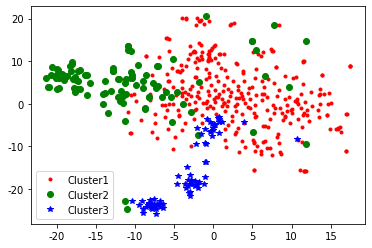

In [110]:
## Spectral clustering
K = 3
from sklearn.cluster import SpectralClustering, Birch
sc = SpectralClustering(K, affinity='precomputed', n_init=100, assign_labels='discretize')
sc_result = sc.fit_predict(np.array(corr_matrix))

# x -> y
SC_result = return_data.T
SC_result['SC_cluster'] = sc_result
X = np.array(SC_result.iloc[:, :-1])
Y = np.array(SC_result.iloc[:, -1])

# TSNE 
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(X)  
tsn = pd.DataFrame(tsne.embedding_)#, index=data.index)  # transform to 2d
print('tsne: \n', tsne)

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False  

# plot each cluster with different color
color_style = ['r.', 'go', 'b*']
for i in range(K):
    d = tsn[Y == i]
    plt.plot(d[0], d[1], color_style[i], label='Cluster' + str(i+1))
plt.legend()
plt.show()

#### 4.2 Mean Shift

1) Introduction: MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

2) Input: Distances between points, which is the correlation of data points.


number of estimated clusters [Mean Shift]: 2


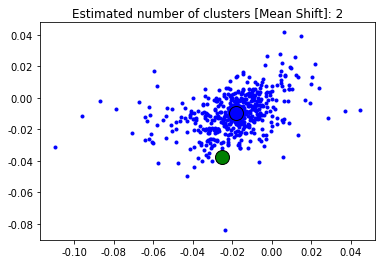

In [111]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.9, n_samples=50)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters [Mean Shift]: %d" % n_clusters_)


from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters [Mean Shift]: %d" % n_clusters_)
plt.show()

In [112]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

#### 4.3 Affinity propagation

1) Introduction: Each item in a dataset can be mapped into Euclidean space using feature values. Affinity propagation depends on a matrix containing Euclidean distances between data points. Since the matrix can quickly become quite large, we should be careful not to take up too much memory. 

2) Input:Distances between points, which is the correlation of data points.

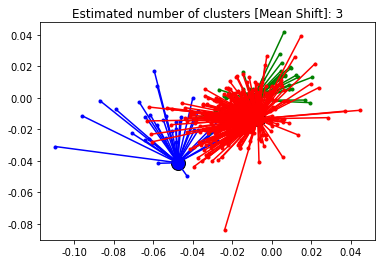

In [113]:

af = AffinityPropagation(preference=-bandwidth, random_state=0)
af.fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    ) 
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
    
plt.title("Estimated number of clusters [Mean Shift]: %d" % n_clusters_)
plt.show()

#### 4.4 Kmeans
​
1) Introduction: The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.



<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>0</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>n</mi>
    </mrow>
  </munderover>
  <munder>
    <mo data-mjx-texclass="OP" movablelimits="true">min</mo>
    <mrow data-mjx-texclass="ORD">
      <msub>
        <mi>&#x3BC;</mi>
        <mi>j</mi>
      </msub>
      <mo>&#x2208;</mo>
      <mi>C</mi>
    </mrow>
  </munder>
  <mo stretchy="false">(</mo>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msub>
    <mi>x</mi>
    <mi>i</mi>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mi>&#x3BC;</mi>
    <mi>j</mi>
  </msub>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msup>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">|</mo>
    </mrow>
    <mn>2</mn>
  </msup>
  <mo stretchy="false">)</mo>
</math>

2) Input: Graph distance. The similarity matrix is provided as an input and consists of a quantitative assessment of the relative similarity of each pair of points in the dataset. For this experiment, we took the corralation matrix as the graph distance matrix. 

tsne: 
 TSNE()


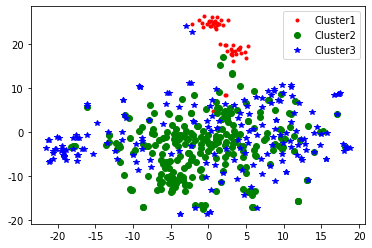

In [114]:
## Spectral clustering
import time
from sklearn.cluster import KMeans

K = 3
from sklearn.cluster import SpectralClustering, Birch
sc = KMeans(init="k-means++", n_clusters=3, n_init=10)
sc_result = sc.fit_predict(np.array(corr_matrix))

# x -> y
SC_result = return_data.T
SC_result['SC_cluster'] = sc_result
X = np.array(SC_result.iloc[:, :-1])
Y = np.array(SC_result.iloc[:, -1])

# TSNE 
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(X)  
tsn = pd.DataFrame(tsne.embedding_)#, index=data.index)  # transform to 2d
print('tsne: \n', tsne)

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False  

# plot each cluster with different color
color_style = ['r.', 'go', 'b*']
for i in range(K):
    d = tsn[Y == i]
    plt.plot(d[0], d[1], color_style[i], label='Cluster' + str(i+1))
plt.legend()
plt.show()

---
### In depth analysis:

##### Clustering analysis for different time periods:

In this part, we repeat the analysis for two more different time periods: 2016 and 2018. To explore the change in the stock markets, we investigate the change of correlations between companies we analyzed in previous parts, and create new clusters based on new set of data.

The first step is to read data from Yahoo Finance using pandas, and use the closing price of these company througout the year to create new dataframes. Note that stock price of some companies became unavailable on Yahoo Fiance, so we have dataframes of less columns than the data from 2015. This will not influence our results too much becuase those stocks that disappeared have relatively smaller market shares

---

 HOW WE GET THE DATA :

import pandas_datareader.data as pdr

def get_stock(symbol, start, end):
    """
    Downloads stock price data from Yahoo
    Returns a pandas dataframe.
    """
    df = pdr.DataReader(symbol, 'yahoo', start, end)
    df = df.sort_index(axis=0)
    return df

price_d_2016 = pd.DataFrame()
#new = get_stock('AMZN','2018-01-02','2018-12-31')['Close']
start = '2016-01-02'
end = '2016-12-31'

# create dataframe of the same company stock prices in another period
for company in price_data.columns:
    try:
        company_data = get_stock(company,start,end)['Close']
        price_d_2016[company] = company_data
    except:
        print(company, ' Data Unavailable')
price_d_2016

price_d_2016.to_csv('SP-500_2016.csv')
price_d_2018.to_csv('SP-500_2018.csv') #store the data as csv file

In [115]:

import matplotlib.pyplot as plt
from datetime import datetime

In [116]:
"""
Use this part to read data if already downloaded csv

"""


filename1 = 'SP-500_2016.csv'
price_d_2016 = pd.read_csv(filename1, index_col=0)
filename2 = 'SP-500_2018.csv'
price_d_2018 = pd.read_csv(filename2, index_col=0)

In [117]:
#returns
returns_2016 = price_d_2016.pct_change()
returns_2018 = price_d_2018.pct_change()

# correlation
correl_2016 = returns_2016.corr()
correl_2018 = returns_2018.corr()


In [118]:
correl_2016

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,WMB,WEC,WYNN,XEL,XRX,XYL,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.386143,0.245604,0.440039,0.276539,0.425800,0.423730,0.286249,0.482555,0.293294,...,0.316085,0.260912,0.261802,0.223218,0.437504,0.596907,0.545626,0.336667,0.468956,0.394408
ABT,0.386143,1.000000,0.440397,0.385149,0.340584,0.474346,0.432469,0.312465,0.300268,0.371019,...,0.215003,0.033612,0.214167,0.021390,0.371302,0.431598,0.341152,0.515243,0.391073,0.484063
ABBV,0.245604,0.440397,1.000000,0.191116,0.211063,0.335514,0.317060,0.170009,0.163821,0.460585,...,0.259280,-0.088406,0.217649,-0.080466,0.248316,0.302232,0.169019,0.363993,0.315924,0.463673
ACN,0.440039,0.385149,0.191116,1.000000,0.410868,0.425928,0.549898,0.236410,0.344406,0.364336,...,0.300693,0.162914,0.240419,0.169201,0.426881,0.444615,0.510892,0.310434,0.373822,0.407510
ATVI,0.276539,0.340584,0.211063,0.410868,1.000000,0.290473,0.552390,0.297594,0.288453,0.252664,...,0.297427,0.132243,0.103402,0.170242,0.266910,0.229426,0.315447,0.325357,0.171900,0.278914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.596907,0.431598,0.302232,0.444615,0.229426,0.529278,0.419345,0.373067,0.401506,0.382413,...,0.325018,0.052445,0.318709,0.060276,0.532711,1.000000,0.471873,0.377284,0.559222,0.386120
YUM,0.545626,0.341152,0.169019,0.510892,0.315447,0.486608,0.542266,0.298318,0.484077,0.371973,...,0.330793,0.185221,0.267421,0.179945,0.388228,0.471873,1.000000,0.342325,0.490230,0.343761
ZBH,0.336667,0.515243,0.363993,0.310434,0.325357,0.383660,0.418639,0.285727,0.274894,0.337987,...,0.285129,0.043431,0.156858,0.053247,0.334912,0.377284,0.342325,1.000000,0.316926,0.406966
ZION,0.468956,0.391073,0.315924,0.373822,0.171900,0.460768,0.373927,0.309102,0.273320,0.431825,...,0.347048,-0.232226,0.297961,-0.236309,0.468649,0.559222,0.490230,0.316926,1.000000,0.326894


In [119]:
correl_2018

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,WMB,WEC,WYNN,XEL,XRX,XYL,YUM,ZBH,ZION,ZTS
MMM,1.000000,0.677784,0.500010,0.679707,0.380262,0.395038,0.534073,0.311675,0.302778,0.343188,...,0.412028,0.176702,0.315861,0.143385,0.408776,0.724413,0.504192,0.531860,0.428725,0.630562
ABT,0.677784,1.000000,0.495260,0.663314,0.468183,0.355013,0.646828,0.328390,0.304400,0.317988,...,0.415403,0.177225,0.338254,0.138384,0.385998,0.585844,0.542651,0.645158,0.470282,0.663037
ABBV,0.500010,0.495260,1.000000,0.473296,0.243659,0.226166,0.372901,0.257769,0.192998,0.308190,...,0.326605,0.107914,0.164280,0.098247,0.269831,0.391389,0.291872,0.452881,0.402737,0.478817
ACN,0.679707,0.663314,0.473296,1.000000,0.458737,0.294465,0.649332,0.402754,0.304909,0.290545,...,0.392941,0.151622,0.315619,0.107278,0.427773,0.538113,0.510480,0.557423,0.496414,0.648214
ATVI,0.380262,0.468183,0.243659,0.458737,1.000000,0.230177,0.613300,0.230564,0.205043,0.212974,...,0.271021,0.011320,0.247882,-0.054860,0.252052,0.312903,0.314660,0.399883,0.315332,0.401615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.724413,0.585844,0.391389,0.538113,0.312903,0.377057,0.503187,0.251112,0.257942,0.295482,...,0.406455,0.085063,0.374073,0.076422,0.377734,1.000000,0.444547,0.471963,0.391012,0.637189
YUM,0.504192,0.542651,0.291872,0.510480,0.314660,0.246561,0.534155,0.268969,0.247322,0.270550,...,0.283621,0.173278,0.150154,0.128688,0.466360,0.444547,1.000000,0.406350,0.357407,0.551634
ZBH,0.531860,0.645158,0.452881,0.557423,0.399883,0.292355,0.536615,0.273071,0.270592,0.297872,...,0.372267,0.187063,0.275891,0.133797,0.396840,0.471963,0.406350,1.000000,0.439524,0.544681
ZION,0.428725,0.470282,0.402737,0.496414,0.315332,0.171371,0.392934,0.344280,0.151666,0.289016,...,0.388072,-0.065153,0.222634,-0.062395,0.378538,0.391012,0.357407,0.439524,1.000000,0.440892


In [120]:

def get_correlation(company,df,n):
    cor_series = df[company]
    top_n = cor_series.nlargest(n+1)[1:]
    bottom_n = cor_series.nsmallest(n)
    return top_n, bottom_n

In [121]:
get_correlation('AMZN',correl,5) #2015 high correlations for AMZN

(GOOGL    0.585553
 GOOG     0.584337
 SBUX     0.571951
 V        0.560704
 MA       0.538708
 Name: AMZN, dtype: float64,
 SRCL    0.056451
 RIG     0.060162
 SWN     0.082376
 TRIP    0.087684
 WFM     0.090700
 Name: AMZN, dtype: float64)

In [122]:
get_correlation('AMZN',correl_2016,10)

(GOOGL    0.600070
 GOOG     0.593167
 EXPE     0.522157
 NWL      0.521737
 MNST     0.494034
 MSFT     0.493418
 EA       0.482508
 TRIP     0.449513
 SBUX     0.446201
 ATVI     0.443197
 Name: AMZN, dtype: float64,
 SRCL   -0.102003
 KSS    -0.067495
 STX    -0.055463
 NEM    -0.049810
 LLL    -0.033322
 SWN    -0.018319
 GPS    -0.003798
 HAR     0.001076
 LMT     0.003944
 M       0.012565
 Name: AMZN, dtype: float64)

In [123]:
get_correlation('AMZN',correl_2018,10)

(MA       0.792316
 V        0.779382
 MSFT     0.774352
 CRM      0.772626
 ADBE     0.758850
 GOOG     0.750268
 GOOGL    0.740041
 NFLX     0.730339
 INTU     0.727846
 ISRG     0.719819
 Name: AMZN, dtype: float64,
 AEP   -0.035199
 SJM   -0.027391
 CPB   -0.018259
 DUK   -0.014932
 SO    -0.013136
 DTE   -0.011855
 COL   -0.011064
 PPL   -0.003459
 D      0.001868
 ED     0.002344
 Name: AMZN, dtype: float64)

From these outputs, the stock. return of Amazon was highly correlated with Google throughout the time. It is not surprising to see big tech companies are correlated to each other since Amazon and Google have been the symbols for tech industry. However, the. correlation between Amazon and Starbucks went down in three years time. Also, it's notable that the correlations between Amazon and Visa and Master card was high in 2015, but went much lower in 2016, but got to the top of the list in 2018.

In [124]:
edges_2016 = create_correlation_list(correl_2016)
edges_2018 = create_correlation_list(correl_2018)

In [125]:
firms_2016 = list(correl_2016.columns)
firms_2018 = list(correl_2018.columns)

set_starters_2016, next_nodes_2016 = cluster_correlations(edges_2016,firms_2016, k=200)
set_starters_2018, next_nodes_2018 = cluster_correlations(edges_2018,firms_2018, k=200)

In [126]:
clusters_2016 = construct_sets(set_starters_2016,next_nodes_2016)
clusters_2018 = construct_sets(set_starters_2018,next_nodes_2018)

In [127]:
clusters_2016

{'CPB': {'CPB'},
 'EMN': {'EMN'},
 'NI': {'AEE',
  'AEP',
  'D',
  'DTE',
  'DUK',
  'ED',
  'EIX',
  'ES',
  'ETR',
  'EXC',
  'NI',
  'PCG',
  'PEG',
  'PNW',
  'PPL',
  'SCG',
  'WEC',
  'XEL'},
 'IP': {'IP'},
 'URI': {'A',
  'ABBV',
  'ABT',
  'ACN',
  'ADBE',
  'ADP',
  'AFL',
  'AIG',
  'AJG',
  'ALB',
  'ALL',
  'ALLE',
  'AME',
  'AMG',
  'AMGN',
  'AMP',
  'AMT',
  'AON',
  'APD',
  'ATVI',
  'AVGO',
  'AVY',
  'AYI',
  'BA',
  'BAX',
  'BDX',
  'BK',
  'BLK',
  'BRK-B',
  'C',
  'CA',
  'CAH',
  'CCI',
  'CFG',
  'CINF',
  'CMA',
  'CMCSA',
  'CTSH',
  'CVX',
  'DFS',
  'DGX',
  'DHI',
  'DOV',
  'EA',
  'ECL',
  'EFX',
  'EMR',
  'ETN',
  'FITB',
  'GLW',
  'GOOG',
  'GOOGL',
  'GS',
  'HOLX',
  'INTC',
  'ITW',
  'IVZ',
  'JNPR',
  'JPM',
  'LH',
  'MCK',
  'MCO',
  'MDT',
  'MHK',
  'MMM',
  'MRK',
  'MS',
  'NTRS',
  'NUE',
  'OMC',
  'ORCL',
  'OXY',
  'PCAR',
  'PFG',
  'PGR',
  'PH',
  'PKI',
  'PNC',
  'PNR',
  'PPG',
  'PRU',
  'QCOM',
  'R',
  'RF',
  'ROK',
  'ROP'

In [128]:
clusters_2018

{'CPB': {'CPB'},
 'CMCSA': {'CMCSA'},
 'BA': {'BA'},
 'IP': {'IP'},
 'ABBV': {'ABBV'},
 'AVY': {'AVY'},
 'ABC': {'ABC'},
 'WY': {'WY'},
 'ENDP': {'ENDP'},
 'GIS': {'GIS'},
 'VTR': {'VTR'},
 'ULTA': {'ULTA'},
 'HOLX': {'HOLX'},
 'CNC': {'CNC'},
 'TAP': {'TAP'},
 'AVB': {'AVB'},
 'TXN': {'TXN'},
 'CVS': {'CVS'},
 'MHK': {'MHK'},
 'M': {'M'},
 'PGR': {'PGR'},
 'MCHP': {'MCHP'},
 'SNA': {'SNA'},
 'UNP': {'A',
  'ABT',
  'ACN',
  'ADBE',
  'ADP',
  'AFL',
  'ALLE',
  'AME',
  'AMG',
  'AMP',
  'AMZN',
  'AON',
  'APD',
  'APH',
  'BAC',
  'BDX',
  'BK',
  'BLK',
  'BRK-B',
  'BSX',
  'C',
  'CAT',
  'CB',
  'CFG',
  'CHRW',
  'CINF',
  'CMA',
  'COF',
  'CRM',
  'CSCO',
  'CSX',
  'CTAS',
  'CTSH',
  'CTXS',
  'DD',
  'DFS',
  'DHR',
  'ECL',
  'EMN',
  'EMR',
  'ETN',
  'EW',
  'EXPD',
  'FFIV',
  'GLW',
  'GOOG',
  'GOOGL',
  'HON',
  'HPQ',
  'ITW',
  'IVZ',
  'JPM',
  'L',
  'LNC',
  'LYB',
  'MA',
  'MMC',
  'MMM',
  'MS',
  'MSFT',
  'NSC',
  'NTRS',
  'PAYX',
  'PCAR',
  'PFG',
  'PH

In [129]:
clusters_2015 = all_clusters
clusters_2015

{'CPB': {'CPB'},
 'EMN': {'EMN'},
 'PCG': {'AEE',
  'AEP',
  'CMS',
  'D',
  'DTE',
  'DUK',
  'ED',
  'EIX',
  'ES',
  'LNT',
  'PCG',
  'PNW',
  'SCG',
  'SO',
  'WEC',
  'XEL'},
 'CMCSA': {'CMCSA'},
 'BA': {'BA'},
 'IP': {'IP'},
 'ABBV': {'ABBV'},
 'AVY': {'AVY'},
 'ABC': {'ABC'},
 'WY': {'WY'},
 'ENDP': {'ENDP'},
 'GIS': {'GIS'},
 'VTR': {'VTR'},
 'ULTA': {'ULTA'},
 'RAI': {'RAI'},
 'HOLX': {'HOLX'},
 'CNC': {'CNC'},
 'CFG': {'CFG'},
 'TAP': {'TAP'},
 'SPG': {'AIV',
  'AVB',
  'BXP',
  'EQR',
  'ESS',
  'FRT',
  'GGP',
  'KIM',
  'SLG',
  'SPG',
  'UDR',
  'VNO'},
 'TXN': {'TXN'},
 'BK': {'BAC',
  'BBT',
  'BK',
  'C',
  'CMA',
  'FITB',
  'GS',
  'HBAN',
  'JPM',
  'KEY',
  'LNC',
  'MET',
  'MS',
  'MTB',
  'NTRS',
  'PBCT',
  'PNC',
  'PRU',
  'RF',
  'STI',
  'STT',
  'UNM',
  'USB',
  'WFC',
  'ZION'},
 'DISCK': {'DISCA', 'DISCK'},
 'CVS': {'CVS'},
 'MHK': {'MHK'},
 'M': {'M'},
 'PFG': {'PFG'},
 'BLK': {'BLK'},
 'PGR': {'PGR'},
 'MCHP': {'MCHP'},
 'SNA': {'SNA'},
 'AME': {'AME

In [130]:
def get_cluster(all_clusters,company):   
    """
    input:  all clusters and the target company
    return: all companies included in the cluster that the 
    target company is included

    """
    for keys in all_clusters:
        if keys == company:
            return [keys, all_clusters[keys]]
        elif company in all_clusters[keys]:
            return [keys, all_clusters[keys]]

In [131]:
get_cluster(clusters_2015,'PCG')

['PCG',
 {'AEE',
  'AEP',
  'CMS',
  'D',
  'DTE',
  'DUK',
  'ED',
  'EIX',
  'ES',
  'LNT',
  'PCG',
  'PNW',
  'SCG',
  'SO',
  'WEC',
  'XEL'}]

In [132]:
get_cluster(clusters_2016,'PCG')

['NI',
 {'AEE',
  'AEP',
  'D',
  'DTE',
  'DUK',
  'ED',
  'EIX',
  'ES',
  'ETR',
  'EXC',
  'NI',
  'PCG',
  'PEG',
  'PNW',
  'PPL',
  'SCG',
  'WEC',
  'XEL'}]

In [133]:
get_cluster(clusters_2018,'PCG')

['PCG', {'PCG'}]

Hence, we can see the change of the clusters which include the company PCG over these years. In 2015, this company was assigned into a cluster of a few companies, and it's assigned to a much bigger cluster in 2016. However, PCG is in the cluster that only contains itself in 2018. We can also notice that the companies in this cluster in 2016 and 2015 has big differnces, where many different companies joined the cluster but many left as well. The cause may be the change of market trend.


### Discussions on drawbacks of this clustering method and possible leader stock in a cluster

One drawback of this clustering method is it tends to crunstruct long and thin clusters because the merging of clusters are performed by simply connecting two elements that has the highest correlation, which means not every pairs of elements in the merged cluster have high correlations. Therefore, in each clusters, there might still exist some pairs of companies that are not really significantly correlated. Hence, if we want to dicide a leader stock, which its growth could imply the growth of whole cluster, the best option is to choose a stock that is highly correlated with most of the companies in the cluster.